#Análise de perfil de ausentes no ENEM 2019

O Enem avalia o desempenho escolar dos estudantes ao término da educação básica. Desde 2014, é uma das principais portas de entrada para a educação superior no Brasil, por meio do Sistema de Seleção Unificada (Sisu).

Segundo o presidente do INEP, no período pré pandemia Covid-19, era esperado uma porcentagem entre 22 e 27% de ausentes. Já durante os anos de 2020 e 2021, a ausência aumentou muito, chegando a 51,5%.  

Gostaríamos de analisar os dados dos candidatos que se ausentam da prova e, se possível, traçar algum perfil que pudesse ser útil para entender melhor como e porque isso ocorre. 

Devido às disparidades de ausências no período da pandemia, escolhemos neste momento trabalhar com os dados de 2019, na expectativa que as porcentagens de ausência se reequilibrem no futuro. 

##Seleção de dados e variáveis

Nessa etapa, excluímos as pessoas que se inscreveram como treineiros.

Também selecionamos apenas as colunas que utilizaremos pra a análise dos perfis.
A intenção é diminuir os gastos com recursos e agilizar as análises.

Em seguida, construímos uma nova coluna, onde definimos os ausentes, eliminados e presentes conforme a seguir:

ausência = 0,
presença = 1,
eliminação = 2 

Sendo ausência, referente a ausência em pelo menos uma das provas, eliminação, referente a eliminação em pelo menos uma das provas e presença, referente a presença em TODAS as provas.

Iniciaremos as análises a partir desse conjunto de dados já trabalhado, conforme código abaixo.

```
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
enem2019 = pd.read_csv('/content/drive/My Drive/MICRODADOS_ENEM_2019.csv', encoding='latin-1', sep=';')

df = enem2019[enem2019['IN_TREINEIRO'] == 0]

presenca = df[(df['TP_PRESENCA_CN'] == 1) & (df['TP_PRESENCA_CH'] == 1) & (df['TP_PRESENCA_LC'] == 1) & (df['TP_PRESENCA_MT'] == 1)]
eliminado = df[(df['TP_PRESENCA_CN'] == 2) | (df['TP_PRESENCA_CH'] == 2) | (df['TP_PRESENCA_LC'] == 2) | (df['TP_PRESENCA_MT'] == 2)]
ausencia = df[(df['TP_PRESENCA_CN'] == 0) | (df['TP_PRESENCA_CH'] == 0) | (df['TP_PRESENCA_LC'] == 0) | (df['TP_PRESENCA_MT'] == 0)]

presenca['presenca'] = 1
eliminado['presenca'] = 2
ausencia['presenca'] = 0

novo = pd.concat([presenca, eliminado, ausencia])
df_ordenado = novo.sort_index()

df_ordenado = df_ordenado[['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO',  'TP_ESTADO_CIVIL', 
         'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 
         'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 
         'CO_MUNICIPIO_ESC', 'SG_UF_ESC', 'CO_MUNICIPIO_PROVA', 'SG_UF_PROVA', 
         'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009',
         'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018',
         'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'presenca']]

df_ordenado.to_csv('MICRODADOS_ENEM_2019_filtrado2.csv', encoding='latin-1', sep=';')
```



##Análise Descritiva dos perfis de ausentes e presentes

Iniciaremos aqui a análise descritiva dos inscrito, ausentes e presentes.

In [1]:
#conecção do Colab ao Drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importação do pandas e do DataFrame a ser utilizado
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/MICRODADOS_ENEM_2019_filtrado2.csv', encoding='latin-1', sep=';')

In [3]:
df.head()

,Unnamed: 0,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,presenca
0,0,190001595656,13,M,1,3,1,1,11,1,...,A,A,A,A,A,C,A,C,B,0
1,1,190001421546,8,M,1,1,1,1,5,1,...,A,A,B,A,A,E,A,A,B,0
2,2,190001133210,13,F,1,3,1,1,13,1,...,A,A,B,A,A,C,A,A,B,0
3,3,190001199383,10,F,1,1,1,1,4,1,...,A,A,C,A,B,D,A,B,B,1
4,4,190001237802,7,F,1,1,1,1,4,1,...,A,A,B,A,A,C,B,B,B,1


In [4]:
df.columns

Index(['Unnamed: 0', 'NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'CO_MUNICIPIO_ESC',
       'SG_UF_ESC', 'CO_MUNICIPIO_PROVA', 'SG_UF_PROVA', 'Q001', 'Q002',
       'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011',
       'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020',
       'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'presenca'],
      dtype='object')

In [5]:
#importação do matplotlib
import matplotlib.pyplot as plt

In [6]:
#separação de DataFrames entre presentes, ausentes e eliminados, 
#para utilização nos gráficos
presentes = df[df['presenca']==1]
ausentes = df[df['presenca']==0]
eliminados = df[df['presenca']==2]

Após importação dos dados, iniaremos as análises, por variável, comparando a porcentagem de ausentes com a porcentagem de inscritos, a fim de verificar se há diferença nas distribuição de ausentes e inscritos. 

Aqui, df é o dataframe com o total de inscritos e ausentes é o dataframe com o total de ausentes. 

Nos gráficos, em azul estão os inscritos e em laranja os ausentes.

####Faixa Etaria

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


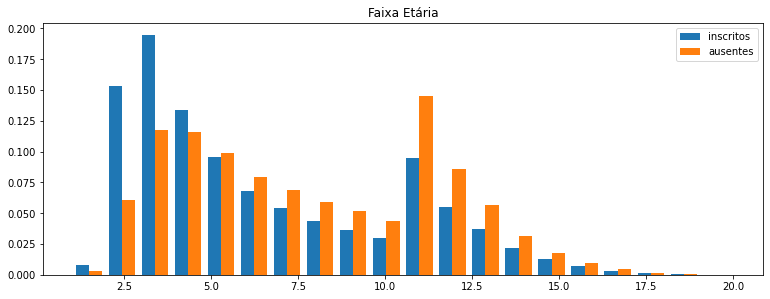

In [7]:
data = [df['TP_FAIXA_ETARIA'], ausentes['TP_FAIXA_ETARIA']]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 0.5])
ax.hist(data, bins=20, density = True)
ax.legend(['inscritos', 'ausentes'], loc='upper right')
ax.set_title('Faixa Etária')
plt.show()

In [8]:
df['TP_FAIXA_ETARIA'].value_counts(normalize=True)[:3]

3    0.185002
2    0.145631
4    0.126704
Name: TP_FAIXA_ETARIA, dtype: float64

In [9]:
ausentes['TP_FAIXA_ETARIA'].value_counts(normalize=True)[:3]

11    0.137916
3     0.111523
4     0.110105
Name: TP_FAIXA_ETARIA, dtype: float64

In [10]:
ausentes['TP_FAIXA_ETARIA'].value_counts(normalize=True).sort_index()/df['TP_FAIXA_ETARIA'].value_counts(normalize=True).sort_index()

1     0.377484
2     0.395579
3     0.602817
4     0.868991
5     1.036695
6     1.169244
7     1.263030
8     1.343329
9     1.410330
10    1.468569
11    1.534925
12    1.565705
13    1.523674
14    1.445875
15    1.356970
16    1.301734
17    1.251282
18    1.238453
19    1.154024
20    1.364575
Name: TP_FAIXA_ETARIA, dtype: float64

Através do histograma, temos indício que as distribuições das faixas etárias são diferentes entre o total de inscritos e os ausentes. Portanto é uma característica relevante para a análise.

Pela relação entre as proporções doa ausentes e dos inscritos, temos que a partir da faixa 5 (acima de 20 anos), todas as faixas etárias têm ausentes acima do esperado (valor maior que 1 na razão), tendo como pico as faixas 11, 12 e 13 (entre 26 e 40 anos)

####Sexo

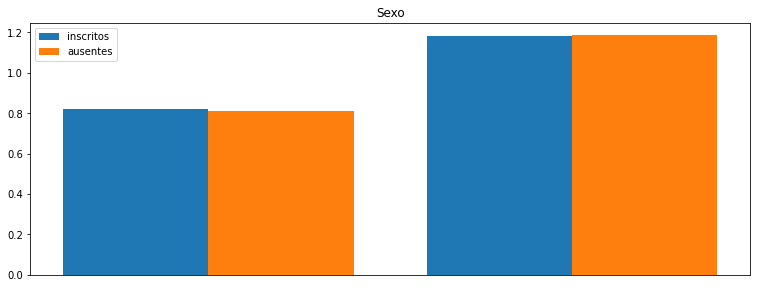

In [11]:
data = [df['TP_SEXO'], ausentes['TP_SEXO']]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 0.5])
ax.hist(data, bins=2, density = True)
ax.legend(['inscritos', 'ausentes'], loc='upper left')
ax.set_title('Sexo')
plt.show()

In [12]:
df['TP_SEXO'].value_counts(normalize=True)[:2]

F    0.590463
M    0.409537
Name: TP_SEXO, dtype: float64

In [13]:
ausentes['TP_SEXO'].value_counts(normalize=True)[:2]

F    0.593962
M    0.406038
Name: TP_SEXO, dtype: float64

In [14]:
ausentes['TP_SEXO'].value_counts(normalize=True).sort_index()/df['TP_SEXO'].value_counts(normalize=True).sort_index()

F    1.005926
M    0.991456
Name: TP_SEXO, dtype: float64

Pelas propoções, temos indício que as distribuições dos sexos não são diferentes entre o total de inscritos e os ausentes. Portanto não é uma característica relevante para a análise.

Pela relação entre as proporções doa ausentes e dos inscritos, temos que não há ausentes acima do esperado por sexo.

####Estado Civil

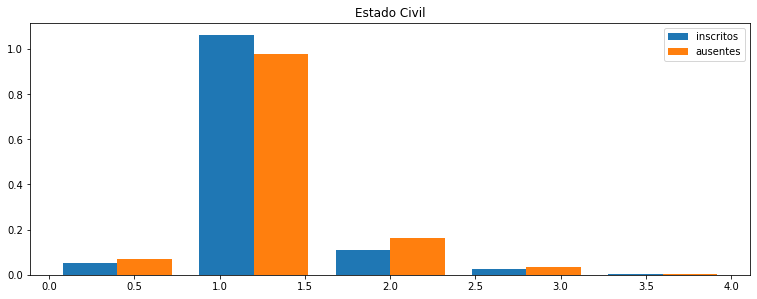

In [15]:
data = [df['TP_ESTADO_CIVIL'], ausentes['TP_ESTADO_CIVIL']]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 0.5])
ax.hist(data, bins=5, density = True)
ax.legend(['inscritos', 'ausentes'], loc='upper right')
ax.set_title('Estado Civil')
plt.show()

In [16]:
df['TP_ESTADO_CIVIL'].value_counts(normalize=True)[:3]

1    0.850259
2    0.087617
0    0.041858
Name: TP_ESTADO_CIVIL, dtype: float64

In [17]:
ausentes['TP_ESTADO_CIVIL'].value_counts(normalize=True)[:3]

1    0.782741
2    0.131522
0    0.056751
Name: TP_ESTADO_CIVIL, dtype: float64

In [18]:
ausentes['TP_ESTADO_CIVIL'].value_counts(normalize=True).sort_index()/df['TP_ESTADO_CIVIL'].value_counts(normalize=True).sort_index()

0    1.355806
1    0.920591
2    1.501100
3    1.433864
4    1.380170
Name: TP_ESTADO_CIVIL, dtype: float64

Há indícios de que os solteiros se ausentam menos do que os casados ou divorciados. 

Pela relação entre as proporções dos ausentes e dos inscritos, temos que os solteiros se ausentam menos que o esperado, enquanto os outros estados civis se ausentam mais.

####Cor Raça

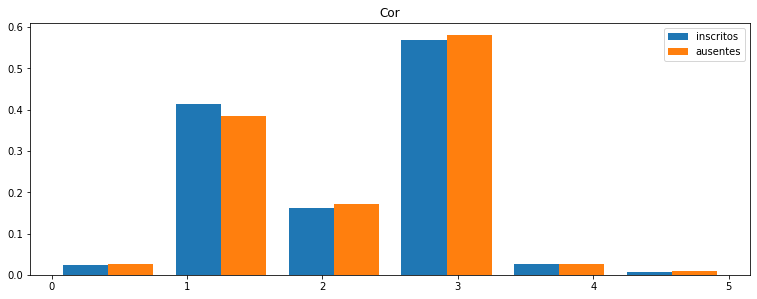

In [19]:
data = [df['TP_COR_RACA'], ausentes['TP_COR_RACA']]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 0.5])
ax.hist(data, bins=6, density = True)
ax.legend(['inscritos', 'ausentes'], loc='upper right')
ax.set_title('Cor')
plt.show()

In [23]:
df['TP_COR_RACA'].value_counts(normalize=True)[:3]

3    0.472955
1    0.344146
2    0.134041
Name: TP_COR_RACA, dtype: float64

In [24]:
ausentes['TP_COR_RACA'].value_counts(normalize=True)[:3]

3    0.484449
1    0.321455
2    0.143187
Name: TP_COR_RACA, dtype: float64

In [22]:
ausentes['TP_COR_RACA'].value_counts(normalize=True).sort_index()/df['TP_COR_RACA'].value_counts(normalize=True).sort_index()

0    1.061750
1    0.934066
2    1.068236
3    1.024303
4    0.993756
5    1.150161
Name: TP_COR_RACA, dtype: float64

Há uma pequena diferença entre a distribuição das cores dos inscritos e ausentes que precisa ser investigada, para sabermos se há relevância nessa variável ou não. 

Pela relação entre as proporções dos ausentes e dos inscritos, temos que os brancos e amarelos se ausentam um pouco menos que o esperado, enquanto os pretos e pardos se ausentam um pouco mais e os indígenas são os que mais se ausentam.

####Tipo de escola

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


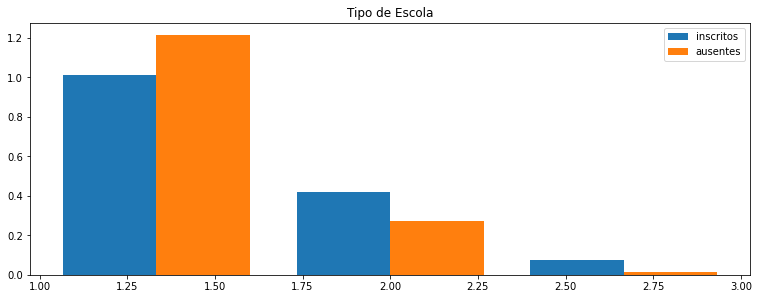

In [25]:
data = [df['TP_ESCOLA'], ausentes['TP_ESCOLA']]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 0.5])
ax.hist(data, bins=3, density = True)
ax.legend(['inscritos', 'ausentes'], loc='upper right')
ax.set_title('Tipo de Escola')
plt.show()

In [26]:
df['TP_ESCOLA'].value_counts(normalize=True)[:5]

1    0.672690
2    0.278493
3    0.048817
Name: TP_ESCOLA, dtype: float64

In [27]:
ausentes['TP_ESCOLA'].value_counts(normalize=True)[:5]

1    0.809891
2    0.181548
3    0.008561
Name: TP_ESCOLA, dtype: float64

In [31]:
df[df['TP_ESCOLA'] != 1]['TP_ESCOLA'].value_counts(normalize=True)[:5]

2    0.850854
3    0.149146
Name: TP_ESCOLA, dtype: float64

In [32]:
ausentes[ausentes['TP_ESCOLA'] != 1]['TP_ESCOLA'].value_counts(normalize=True)[:5]

2    0.954968
3    0.045032
Name: TP_ESCOLA, dtype: float64

In [33]:
ausentes[ausentes['TP_ESCOLA'] != 1]['TP_ESCOLA'].value_counts(normalize=True).sort_index()/df[df['TP_ESCOLA'] != 1]['TP_ESCOLA'].value_counts(normalize=True).sort_index()

2    1.122363
3    0.301935
Name: TP_ESCOLA, dtype: float64

67% dos inscritos não informaram o tipo de escola e 80% dos ausentes também não. Eliminando essa opção, analisamos apenas os que informaram o tipo de escola.

Temos indício que as distribuições dos tipos de escola são diferentes entre o total de inscritos e os ausentes. Portanto seria uma característica relevante para a análise. Porém, com uma porcentagem tão alta sem informação é preciso definir se esta variável poderá ser utilizada ou não.

Pelas propoções, alunos de escolas públicas se ausentam mais que o esperado enquanto alunos de escola particular se ausentam menos. 

####UF da escola em que fez a prova

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


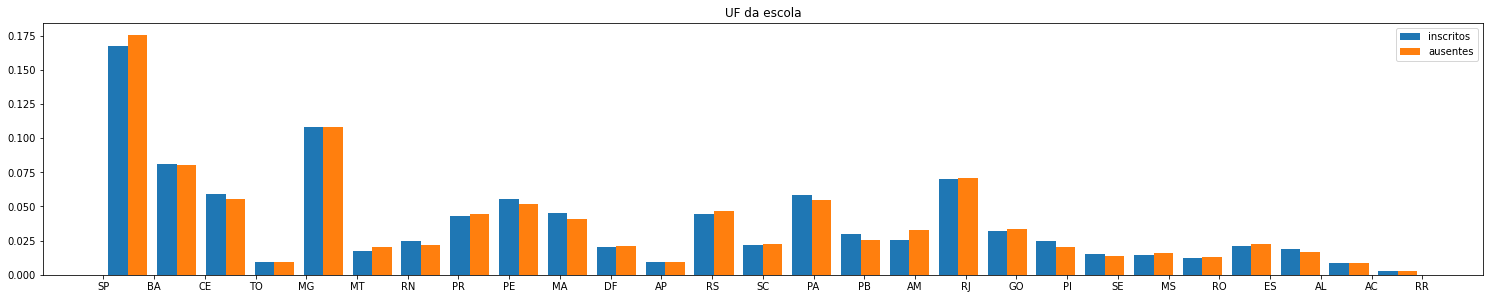

In [34]:
data = [df['SG_UF_PROVA'], ausentes['SG_UF_PROVA']]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 2, 0.5])
ax.hist(data, bins=27, density = True)
ax.legend(['inscritos', 'ausentes'], loc='upper right')
ax.set_title('UF da escola')
plt.show()

In [36]:
df['SG_UF_PROVA'].value_counts(normalize=True)[:3]

SP    0.161130
MG    0.103915
BA    0.077817
Name: SG_UF_PROVA, dtype: float64

In [35]:
ausentes['SG_UF_PROVA'].value_counts(normalize=True)[:3]

SP    0.169017
MG    0.103934
BA    0.077120
Name: SG_UF_PROVA, dtype: float64

In [39]:
(ausentes['SG_UF_PROVA'].value_counts(normalize=True).sort_index()/df['SG_UF_PROVA'].value_counts(normalize=True).sort_index()).sort_values()

PI    0.822214
PB    0.837930
RN    0.872395
SE    0.875530
AL    0.896904
MA    0.909848
PE    0.929989
PA    0.939232
CE    0.943293
BA    0.991051
MG    1.000184
RJ    1.008343
AC    1.031296
GO    1.034365
PR    1.039369
DF    1.044051
SC    1.044100
SP    1.048953
RS    1.050879
AP    1.057131
TO    1.057348
ES    1.069110
RO    1.106519
MS    1.118114
RR    1.142792
MT    1.165242
AM    1.275549
Name: SG_UF_PROVA, dtype: float64

Pelas proporções entre ausentes e inscritos, podemos perceber que há alguns estados com uma proporção de ausentes maior que a de inscritos, como AM, MT, RR, MS, RO, ES, TO, AP, RS, SP, SC, DF, PR, GO e AC. E outros com menor proporção de ausentes que a de inscritos, como PI, PB, SE, AL, MA, PE, PA e CE.

Portanto esta é uma variável relevante para esta análise. 

####Renda

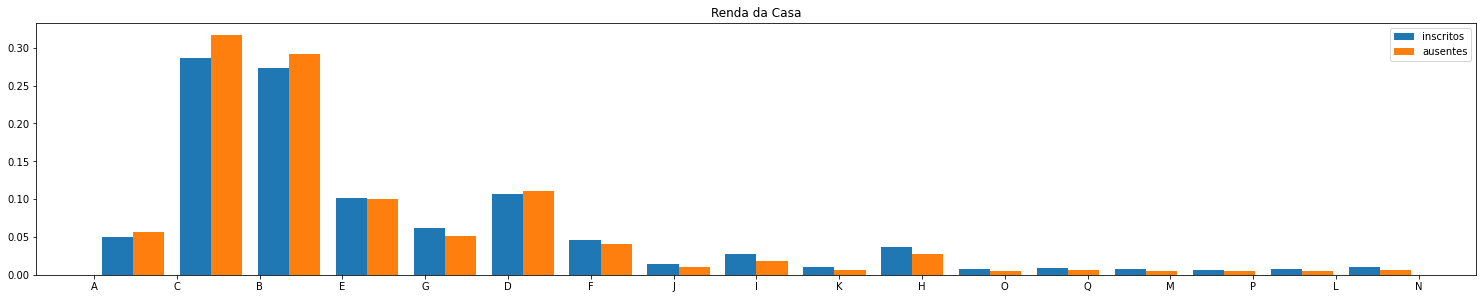

In [41]:
data = [df['Q006'], ausentes['Q006']]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 2, 0.5])
ax.hist(data, bins=17, density = True)
ax.legend(['inscritos', 'ausentes'], loc='upper right')
ax.set_title('Renda da Casa')
plt.show()

In [42]:
(ausentes['Q006'].value_counts(normalize=True).sort_index()/df['Q006'].value_counts(normalize=True).sort_index()).sort_values()

K    0.628071
N    0.635684
M    0.647377
L    0.648904
O    0.650953
P    0.653789
J    0.669752
I    0.679145
Q    0.716425
H    0.755519
G    0.831845
F    0.892912
E    0.991445
D    1.038424
B    1.066635
C    1.105738
A    1.133405
Name: Q006, dtype: float64

Nesse caso, é possível perceber que, em rendas maiores, a proporção de ausentes é menor. 

####Número de pessoas na casa

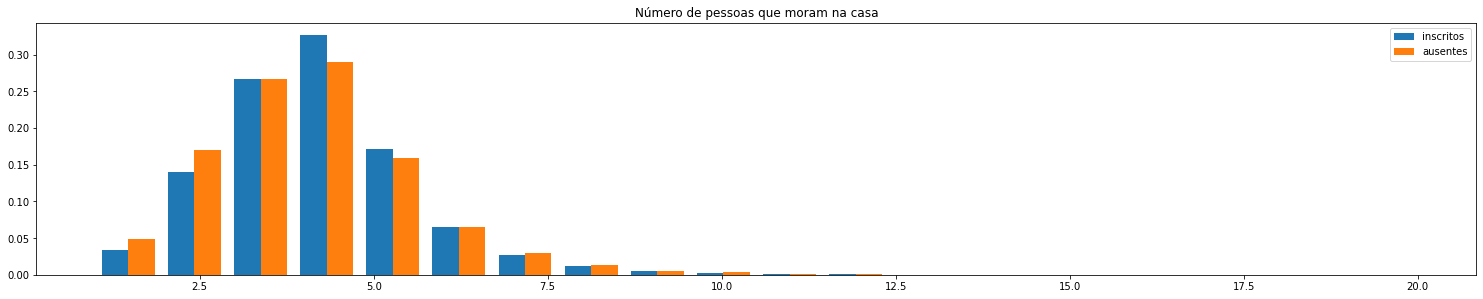

In [43]:
data = [df['Q005'], ausentes['Q005']]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 2, 0.5])
ax.hist(data, bins=20, density = True)
ax.legend(['inscritos', 'ausentes'], loc='upper right')
ax.set_title('Número de pessoas que moram na casa')
plt.show()

In [45]:
df['Q005'].value_counts(normalize=True)[:3]

4    0.310692
3    0.253269
5    0.162217
Name: Q005, dtype: float64

In [46]:
ausentes['Q005'].value_counts(normalize=True)[:3]

4    0.275224
3    0.253028
2    0.160991
Name: Q005, dtype: float64

In [48]:
(ausentes['Q005'].value_counts(normalize=True).sort_index()/df['Q005'].value_counts(normalize=True).sort_index())

1     1.486072
2     1.205267
3     0.999050
4     0.885844
5     0.934706
6     1.004234
7     1.054266
8     1.082702
9     1.084119
10    1.110387
11    1.097078
12    1.095631
13    1.120532
14    1.170332
15    1.057583
16    0.994946
17    1.204584
18    1.125748
19    1.231286
20    1.177711
Name: Q005, dtype: float64

Aqui, percebemos que pessoas que moram com 3 a 5 pessoas se ausentam menos. Enquanto pessoas que moram sozinhas, com mais 1 pessoa ou com mais de 6 pessoas se ausentam mais. 

####Internet

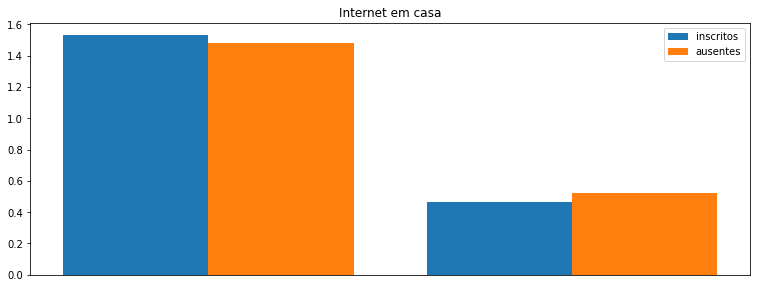

In [49]:
data = [df['Q025'], ausentes['Q025']]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 0.5])
ax.hist(data, bins=2, density = True)
ax.legend(['inscritos', 'ausentes'], loc='upper right')
ax.set_title('Internet em casa')
plt.show()

In [50]:
df['Q025'].value_counts(normalize=True)[:5]

B    0.766472
A    0.233528
Name: Q025, dtype: float64

In [51]:
ausentes['Q025'].value_counts(normalize=True)[:5]

B    0.739252
A    0.260748
Name: Q025, dtype: float64

In [53]:
ausentes['Q025'].value_counts(normalize=True).sort_index()/df['Q025'].value_counts(normalize=True).sort_index()

A    1.116563
B    0.964486
Name: Q025, dtype: float64

Aqui, temos que pessoas com internet em casa se ausentam menos. 

Entre os inscritos, 76,6% têm acesso à internet em casa e 23% não. Entre os ausentes, 74% têm acesso à internet em casa e 26% não.

###Perfis encontrados

O perfil das maiores ausências proporcionalmente aos inscritos são os seguintes:

Em relação à faixa etária, as pessoas entre 26 e 40 anos.

Em relação à estado civil, as pessoas casadas, divorciadas ou viúvas (que pode ter relação com a faixa etária).

Em relação a cor, as pessoas pretas, pardas ou indígenas.

Em relação ao tipo de escola, alunos de escola pública.

Em relação a UF, alunos de estados do Norte, Centro-Oeste e Sul.

Em relação a renda, pessoas cuja renda da casa vai de 0 a 2000 reais declarados no questionário.

Em relação ao número de pessoas que moram na casa, temos 2 grupos. Um de pessoas que moram sozinhas ou com mais 1 pessoas. E outro grupo de pessoas que moram com mais de 6 pessoas. 

Em relação a ter internet em casa, pessoas que não têm.


